# Build Simple and Multiple Linear Regression from Scratch

In this notebook I will implement a linear regression model, and test it as a simple linear regression model in predicting sales given a TV marketing budget, and as a Multiple linear regression model in predicting house prices based on their size and quality.

# Objective

The objective is to solidify my understanding of linear regression model and their underhood details.

# Table of Contents

- [ 1 - Simple Linear Regression](#1)
  - [ 1.1 - Simple Linear Regression Model](#1.1)
  - [ 1.2 - Dataset](#1.2)
- [ 2 - Implementation of the Linear Regression Model](#2)
  - [ 2.1 - Defining the Linear Regression Model Structure (Number of Features)](#2.1)
  - [ 2.2 - Initialize the Model's Parameters](#2.2)
  - [ 2.3 - The Loop](#2.3)
      - [ 2.3.1 - Forward Propagation](#2.3.1)
      - [ 2.3.2 - Cost Function](#2.3.2)
      - [ 2.3.3 - Back Propagation](#2.3.3)
      - [ 2.3.4 - Update Parameters](#2.3.4)
  - [ 2.4 - Integrate parts 2.1, 2.2 and 2.3 in linear_regression() and make predictions](#2.4)
- [ 3 - Multiple Linear Regression](#3)
  - [ 3.1 - Multipe Linear Regression Model](#3.1)
  - [ 3.2 - Dataset](#3.2)
  - [ 3.3 - Performance of the Linear Regression Model for Multiple Linear Regression](#3.3)

## Packages

Let's first import all the required packages.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Operational Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline

# Sci-kit linear regression model to compare our model
from sklearn.linear_model import LinearRegression

# Set random seed for reproducible results
np.random.seed(3)

<a name='1'></a>
## 1 - Simple Linear Regression

<a name='1.1'></a>
### 1.1 - Simple Linear Regression Model

We can describe a simple linear regression model as

$$\hat{y} = wx + b,\tag{1}$$

where $\hat{y}$ is a prediction of dependent variable $y$ based on independent variable $x$ using a line equation with the slope $w$ and intercept $b$. 

Given a set of training data points $(x_1, y_1)$, ..., $(x_m, y_m)$, you will find the "best" fitting line - such parameters $w$ and $b$ that the differences between original values $y_i$ and predicted values $\hat{y}_i = wx_i + b$ are minimum.

**Weight** ($w$) and **bias** ($b$) are the parameters that will get updated when we **train** the model. They are initialized to some random values or set to 0 and updated as the training progresses.

For each training example $x^{(i)}$, the prediction $\hat{y}^{(i)}$ can be calculated as:

\begin{align}
\hat{y}^{(i)} &=  w x^{(i)} + b,\\
\tag{2}\end{align}

where $i = 1, \dots, m$.

We can organise all training examples as a vector $X$ of size ($1 \times m$) and perform scalar multiplication of $X$ ($1 \times m$) by a scalar $w$, adding $b$, which will be broadcasted to a vector of size ($1 \times m$):

\begin{align}
\hat{Y} &=  w X + b,\\
\tag{3}\end{align}

This set of calculations is called **forward propagation**.

For each training example we can measure the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$. Division by $2$ is taken just for scaling purposes, To compare the resulting vector of the predictions $\hat{Y}$ ($1 \times m$) with the vector $Y$ of original values $y^{(i)}$, We can take an average of the loss function values for each of the training examples:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.\tag{4}$$

This function is called the sum of squares **cost function**. The aim is to optimize the cost function during the training, which will minimize the differences between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$.

When our weights were just initialized with some random values, and no training was done yet, you can't expect good results. We need to calculate the adjustments for the weight and bias, minimizing the cost function. This process is called **backward propagation**. 

According to the gradient descent algorithm, you can calculate partial derivatives as:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial w } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right).
\tag{5}\end{align}

We can see how the additional division by $2$ in the equation $(4)$ helped to simplify the results of the partial derivatives. Then update the parameters iteratively using the expressions

\begin{align}
w &= w - \alpha \frac{\partial \mathcal{L} }{ \partial w },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b },
\tag{6}\end{align}

where $\alpha$ is the learning rate. Then repeat the process until the cost function stops decreasing.

The general **methodology** to build a Linear regression model is to:
1. Initialize the model's parameters
2. Loop:
    - Implement forward propagation (calculate the model output),
    - Implement backward propagation (to get the required corrections for the parameters),
    - Update parameters.
3. Make predictions.

<a name='1.2'></a>
### 1.2 - Dataset

Load the [Kaggle dataset](https://www.kaggle.com/code/devzohaib/simple-linear-regression/notebook), saved in a file `tvmarketing.csv`. It has two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

In [2]:
#Load the Data for Single Linear Regression
df_simple = pd.read_csv('tvmarketing.csv')
df_simple.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
df_simple.shape

(200, 2)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

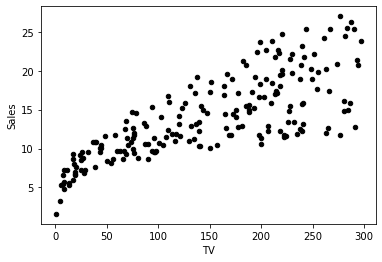

In [4]:
df_simple.plot(x='TV', y='Sales', kind='scatter', c='black')

The fields `TV` and `Sales` have different units. For making gradient descent algorithm efficient, We needed to normalize each of them: subtract the mean value of the array from each of the elements in the array and divide them by the standard deviation.

In [5]:
df_simple_norm = (df_simple - df_simple.mean())/df_simple.std()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

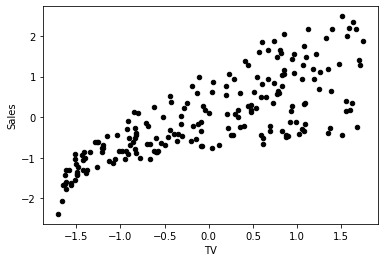

In [6]:
df_simple_norm.plot(x='TV', y='Sales', kind='scatter', c='black')

Now we can see the two fields have near units, Save the fields into variables `X_norm` and `Y_norm` and reshape them to row vectors:

In [7]:
X_norm = df_simple_norm['TV']
Y_norm = df_simple_norm['Sales']
X_norm = np.array(X_norm).reshape((1, len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1,len(Y_norm)))

<a name='2'></a>
## 2 - Implementation of the Linear Regression Model

Setup the model in a way which will allow to extend this simple case of a model with a single feature and one output to more complicated structures later.

In [8]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_y)

In [9]:
(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print('The number of Features:',n_x)
print('The number of predicted output:',n_y)

The number of Features: 1
The number of predicted output: 1


<a name='2.2'></a>
### 2.2 - Initialize the Model's Parameters

Implement the function `initialize_parameters()`, initializing the weights array of shape $(n_y \times n_x) = (1 \times 1)$ with random values and the bias vector of shape $(n_y \times 1) = (1 \times 1)$ with zeros.

In [10]:
def initialize_parameters(n_x,n_y):
    
    W = np.random.randn(n_y,n_x) * 0.01
    b = np.zeros((n_y,1))
    
    parameters = {'W': W, 'b': b}
    return parameters

In [11]:
parameters = initialize_parameters(1,1)
parameters

{'W': array([[0.01788628]]), 'b': array([[0.]])}

<a name='2.3'></a>
### 2.3 - The Loop

<a name='2.3.1'></a>
#### 2.3.1 - Forward Propagation:

Implement `forward_propagation()` following the equation $(3)$ in the section [1.1](#1.1):
\begin{align}
\hat{Y} &=  w X + b\\
\end{align}

In [12]:
def forward_propegation(X,paramaters):
    W = paramaters['W']
    b = paramaters['b']
    Z = np.matmul(W,X) + b
    return Z

In [13]:
Y_predict = forward_propegation(X_norm,parameters)
print(Y_predict[0,:5])

[ 0.01730363 -0.021363   -0.0270505   0.00092865  0.00703281]


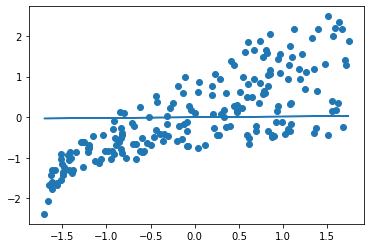

In [14]:
plt.scatter(x=X_norm, y=Y_norm)
plt.plot(X_norm[0],Y_predict[0])
plt.show()

This Line Represent our linear model with the random initialization parameters, And our goal to best fit this line.

<a name='2.3.2'></a>
### 2.3.2 - Cost Function

Our weights were just initialized with some random values, so the model has not been trained yet. 

Define a cost function $(4)$ which will be used to train the model:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [15]:
def cost_function(Y,Y_predict):
    m = Y.shape[1]
    cost =  np.sum((Y-Y_predict)**2)/(2*m)
    return cost

In [16]:
print('Cost Value for our model before training:',cost_function(Y_norm,Y_predict))
print('Cost Value for predicting mean of values only:',cost_function(Y_norm,Y_norm[0].mean()))

Cost Value for our model before training: 0.48373802644758923
Cost Value for predicting mean of values only: 0.49750000000000016


**Notice our model preformance is very close to just predicting the mean value for all values of x**

<a name='2.3.3'></a>
#### 2.3.3 - Back Propagation

Calculate partial derivatives as shown in $(5)$:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial w } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right).
\end{align}

In [17]:
def back_propegation(Y,Y_predict,X):
    m = Y.shape[1]
    dZ= (Y_predict-Y)
    dW = 1/m * np.dot(dZ,X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    
    grads = {'dW':dW, 'db':db}
    return grads

In [18]:
grads = back_propegation(Y_norm,Y_predict,X_norm)
grads

{'dW': array([[-0.76051645]]), 'db': array([[5.10702591e-16]])}

<a name='2.3.4'></a>
#### 2.3.4 - Update parameters

Update parameters as shown in $(6)$:

\begin{align}
w &= w - \alpha \frac{\partial \mathcal{L} }{ \partial w },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b }.
\end{align}


In [19]:
def update_parameters(grads,parameters,learning_rate=1.2):
    W = parameters['W']
    b = parameters['b']
    
    dW = grads['dW']
    db = grads['db']
    
    W = W - (learning_rate * dW)
    b = b - (learning_rate * db)
    parameters ={'W':W, 'b':b}
    return parameters

In [20]:
parameters = update_parameters(grads, parameters)
print('New parameters:',parameters)

New parameters: {'W': array([[0.93050602]]), 'b': array([[-6.1284311e-16]])}


<a name='2.4'></a>
### 2.4 - Integrate parts 2.1, 2.2 and 2.3 in linear_regression() and make predictions

In [21]:
def linear_regression(X,Y,learning_rate = 1.2, number_of_iteration = 100,visualize = False, print_cost = False):
    n_x,n_y = layer_sizes(X, Y)
    parameters = initialize_parameters(n_x,n_y)
    if visualize and X.shape[0] ==1:
        # For Visualization purpose i will set the parameters manualy :)
        parameters['W'][0] = -0.7
    for i in range(number_of_iteration):
        Y_predict = forward_propegation(X,parameters)
        grads = back_propegation(Y,Y_predict,X)
        parameters = update_parameters(grads, parameters,learning_rate)
        if visualize and X.shape[0] == 1:
            plt.scatter(x=X[0], y=Y[0])
            plt.plot(X[0],Y_predict[0])
            plt.xlabel('cost in iteration #'+str(i+1)+'='+str(cost_function(Y, Y_predict)))
            plt.show()
        elif print_cost:
            print('cost in iteration #', i+1, '=', cost_function(Y, Y_predict))
    return parameters

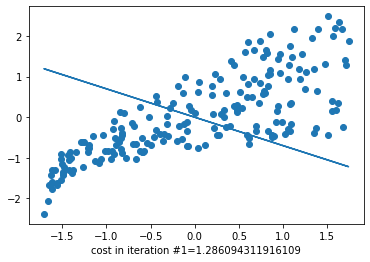

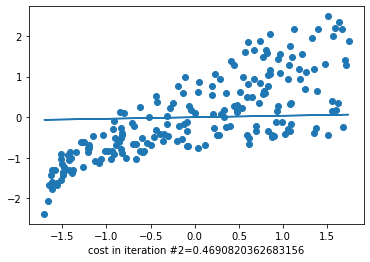

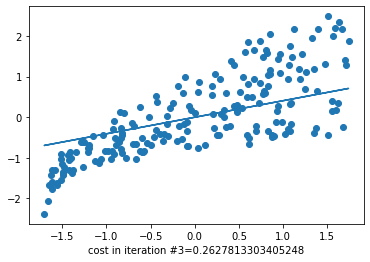

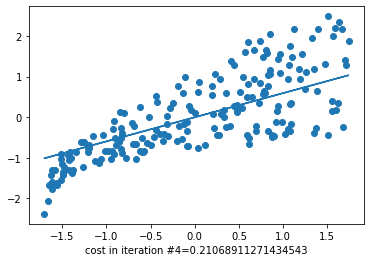

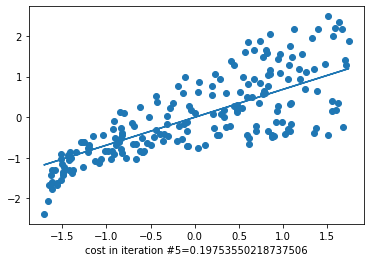

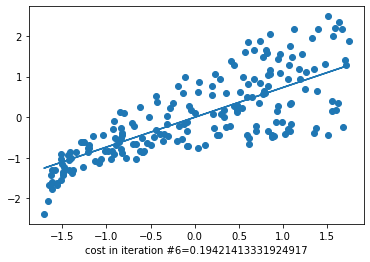

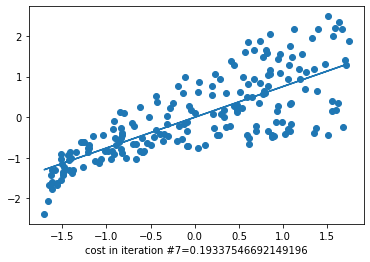

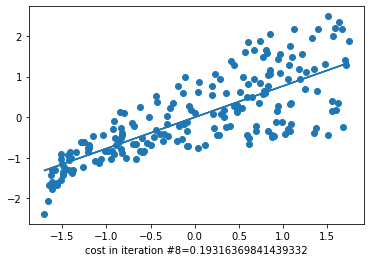

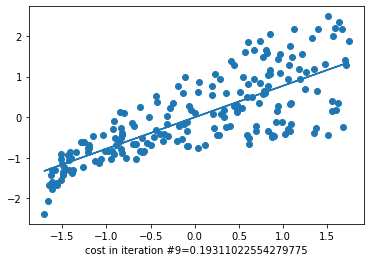

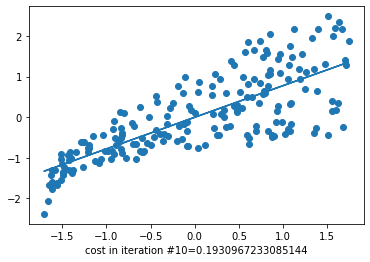

In [22]:
parameters_simple = linear_regression(X_norm,Y_norm,0.5, 10, visualize = True)

We can see that after a few iterations the cost function does not change anymore (the model converges).

*Note*: This is a very simple model. In reality the models do not converge that quickly.

In [23]:
reg = LinearRegression().fit(X_norm.T, Y_norm.T)
print('W', parameters_simple['W'])
print('b', parameters_simple['b'])
print('W', reg.coef_)
print('b', reg.intercept_)

W [[0.78070292]]
b [[-6.15063556e-16]]
W [[0.78222442]]
b [-6.15113168e-16]


**Notice that our model parameters are very close to sklearn model parameter**

In [24]:
def predict(X, Y, parameters, X_pred):
    
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    
    # Use the same mean and standard deviation of the original training array X.
    if isinstance(X, pd.Series):
        X_mean = np.mean(X)
        X_std = np.std(X)
        X_pred_norm = ((X_pred - X_mean)/X_std).reshape((1, len(X_pred)))
    else:
        X_mean = np.array(np.mean(X)).reshape((len(X.axes[1]),1))
        X_std = np.array(np.std(X)).reshape((len(X.axes[1]),1))
        X_pred_norm = ((X_pred - X_mean)/X_std)
    # Make predictions.
    Y_pred_norm = np.matmul(W, X_pred_norm) + b
    # Use the same mean and standard deviation of the original training array Y.
    Y_pred = Y_pred_norm * np.std(Y) + np.mean(Y)
    
    return Y_pred[0]

X_pred = np.array([50, 120, 280])
Y_pred = predict(df_simple["TV"], df_simple["Sales"], parameters_simple, X_pred)
print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales:\n{Y_pred}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales:
[ 9.41839849 12.73949085 20.33055911]


In [25]:
Y_predict = forward_propegation(X_norm,parameters_simple)
print('Cost Value for our model after training:',cost_function(Y_norm,Y_predict))
print('Cost Value for predicting mean of values only:',cost_function(Y_norm,Y_norm[0].mean()))

Cost Value for our model after training: 0.1930933139099689
Cost Value for predicting mean of values only: 0.49750000000000016


**Now, There is a big difference between our model preformance and model just predict the mean.**

<a name='3'></a>
## 3 - Multiple Linear Regression:

<a name='3.1'></a>
### 3.1 - Multipe Linear Regression Model

You can write a multiple linear regression model with two independent variables $x_1$, $x_2$ as

$$\hat{y} = w_1x_1 + w_2x_2 + b = Wx + b,\tag{7}$$

where $Wx$ is the dot product of the input vector $x = \begin{bmatrix} x_1 & x_2\end{bmatrix}$ and the parameters vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$, scalar parameter $b$ is the intercept. The goal of the training process is to find the "best" parameters $w_1$, $w_2$ and $b$ such that the differences between original values $y_i$ and predicted values $\hat{y}_i$ are minimum for the given training examples.

<a name='3.2'></a>
### 3.2 - Dataset

Let's build a linear regression model for a Kaggle dataset [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), saved in a file `house_prices_train.csv`. We will use two fields - we will make a simple test to figure out two fields have a linear relationship sales price (`SalePrice`, dollars).

In [26]:
df_house = pd.read_csv('houseprice.csv')
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [27]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We have a lot of features but we will choose only two with linear relationship with our target value (Sales price)

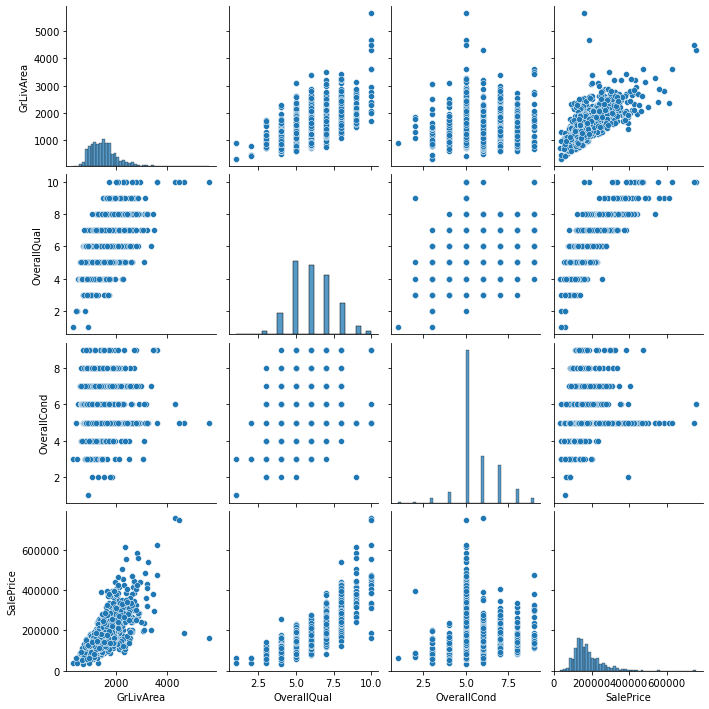

In [28]:
sns.pairplot(df_house[['GrLivArea', 'OverallQual','OverallCond','SalePrice']])

**Notice 'GrLivArea' and 'OverallQual' have a good linear relationship with sales price**
So we will choose them for our modeling, but before we using we will scale their values, and reshape them to row vectors.

In [29]:
df_house0 = df_house[['GrLivArea', 'OverallQual','SalePrice']]
X_house = df_house0[['GrLivArea', 'OverallQual']]
Y_house = df_house0['SalePrice']

In [30]:
print('X shape:',X_house.shape)
print('Y shape:', Y_house.shape)

X shape: (1460, 2)
Y shape: (1460,)


In [31]:
# Scale their values by Normalization
X_house_norm = (X_house - X_house.mean()) / X_house.std()
Y_house_norm = (Y_house - Y_house.mean()) / Y_house.std()

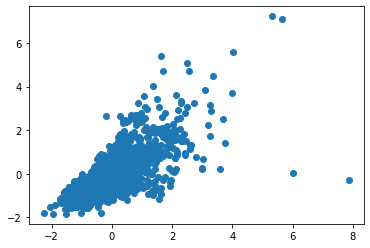

In [32]:
plt.scatter(x=X_house_norm['GrLivArea'], y=Y_house_norm)
plt.show()

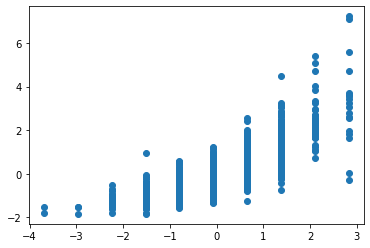

In [33]:
plt.scatter(x=X_house_norm['OverallQual'], y=Y_house_norm)
plt.show()

In [34]:
# Reshape them to row vectors
X_house_norm = np.array(X_house_norm).T
Y_house_norm = np.array(Y_house_norm).reshape((1,Y_house_norm.shape[0]))

In [35]:
print('X shape:',X_house_norm.shape)
print('Y shape:', Y_house_norm.shape)

X shape: (2, 1460)
Y shape: (1, 1460)


<a name='3.3'></a>
### 3.3 - Performance of the Linear Regression Model for Multiple Linear Regression

In [36]:
parameters_multi = linear_regression(X_house_norm,Y_house_norm,1.2, 100, print_cost=True)

cost in iteration # 1 = 0.5138673068308148
cost in iteration # 2 = 0.44744790314332117
cost in iteration # 3 = 0.39450393763176445
cost in iteration # 4 = 0.35118101807207697
cost in iteration # 5 = 0.31542552843602695
cost in iteration # 6 = 0.28583460824111667
cost in iteration # 7 = 0.26132411042350534
cost in iteration # 8 = 0.24101618990929932
cost in iteration # 9 = 0.22418880465307855
cost in iteration # 10 = 0.21024504794391435
cost in iteration # 11 = 0.19869066537080454
cost in iteration # 12 = 0.18911619216991551
cost in iteration # 13 = 0.1811823526525296
cost in iteration # 14 = 0.17460801424901198
cost in iteration # 15 = 0.16916021950578636
cost in iteration # 16 = 0.16464592976862835
cost in iteration # 17 = 0.16090518457365183
cost in iteration # 18 = 0.15780543345727985
cost in iteration # 19 = 0.15523683910213779
cost in iteration # 20 = 0.15310838532781915
cost in iteration # 21 = 0.15134465200000202
cost in iteration # 22 = 0.14988314257505125
cost in iteration # 2

In [37]:
reg = LinearRegression().fit(X_house_norm.T, Y_house_norm.T)
print('W', parameters_multi['W'])
print('b', parameters_multi['b'])
print('W', reg.coef_)
print('b', reg.intercept_)

W [[0.36946654 0.57182189]]
b [[1.25561662e-16]]
W [[0.36950628 0.57186163]]
b [1.26498599e-16]


**Notice that our model parameters are very close to sklearn model parameter**

Huuraaay, We finished it 💃🏻💃🏻💃🏻